In [3]:
pip install pandas matplotlib seaborn scikit-learn vaderSentiment openpyxl


Note: you may need to restart the kernel to use updated packages.


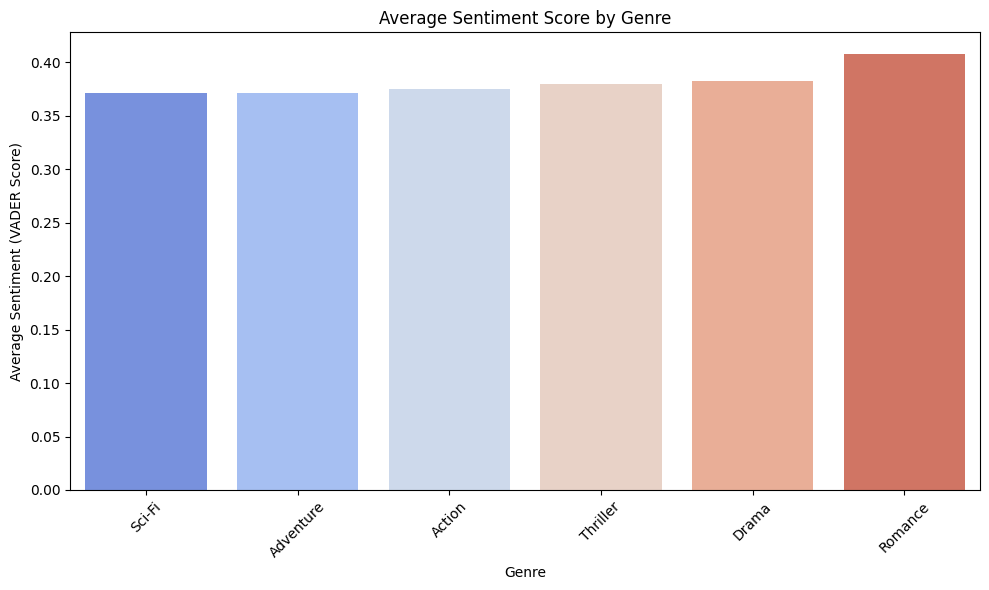

📈 RMSE: 84248462.97
📊 R² Score: -0.0067


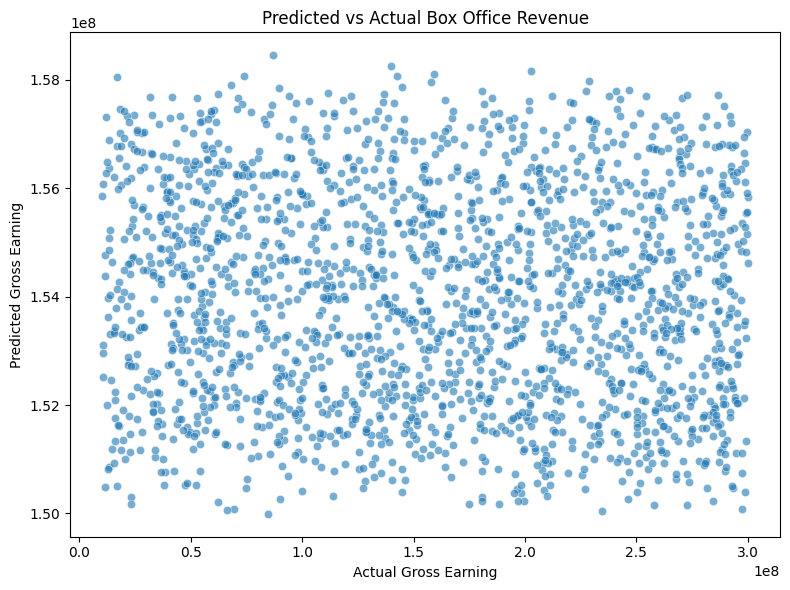

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from math import sqrt

# Load dataset
df = pd.read_excel("movie_reviews_10000_varied_titles.xlsx")

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# Add VADER compound sentiment scores
df['vader_score'] = df['review_tweet'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Convert VADER scores to sentiment labels
def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment'] = df['vader_score'].apply(classify_sentiment)

# =====================================
# 🎯 Genre-wise Sentiment Trend (Bar Plot)
# =====================================
genre_sentiment = df.groupby('genre')['vader_score'].mean().sort_values().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_sentiment, x='genre', y='vader_score', hue='genre', palette='coolwarm', legend=False)
plt.title("Average Sentiment Score by Genre")
plt.ylabel("Average Sentiment (VADER Score)")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# =====================================
# 🎯 Predict Gross Earning Using Linear Regression
# =====================================
features = ['rating', 'budget', 'vader_score']
target = 'gross_earning'

X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📈 RMSE: {rmse:.2f}")
print(f"📊 R² Score: {r2:.4f}")

# =====================================
# 🎯 Visualize Prediction Accuracy
# =====================================
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Gross Earning")
plt.ylabel("Predicted Gross Earning")
plt.title("Predicted vs Actual Box Office Revenue")
plt.tight_layout()
plt.show()

# =====================================
# 💾 Save updated dataset
# =====================================
df.to_excel("movie_reviews_with_vader_analysis.xlsx", index=False)
